In [3]:
# Importing required Liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV

In [4]:
# Loading Dataset
wine_data = pd.read_csv("winequality-red.csv")

In [5]:
# Extraing First 5 rows
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# checking missing values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Checking Data types
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Data Visualization

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

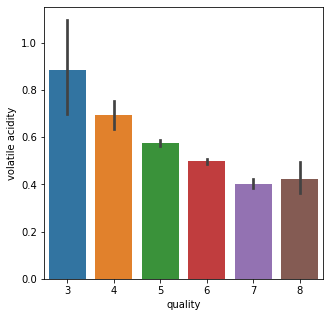

In [8]:
# volatile acidity vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_data)

As per above observation the more the volatile acidity the lesser the quality of wine.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

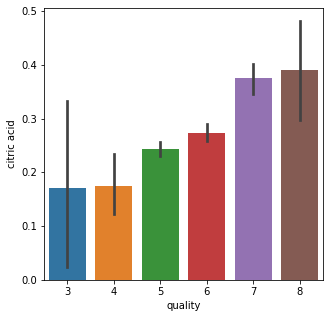

In [9]:
# citric acid vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine_data)

As per above observation the more the citric acid the better the quality of wine.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

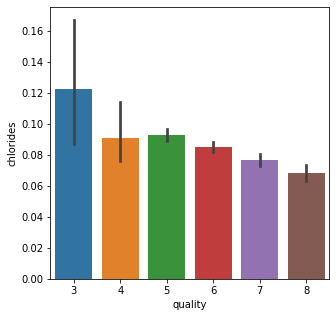

In [10]:
# chlorides vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='chlorides',data=wine_data)

As per above observation the more the chlorides the lesser the quality of wine.

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

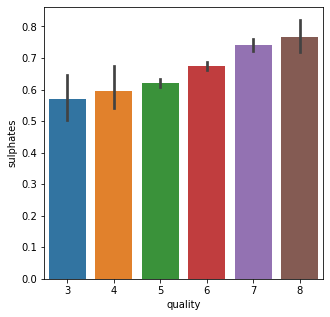

In [11]:
# sulphates vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='sulphates',data=wine_data)

As per above observation the more the sulphates the better the quality of wine.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

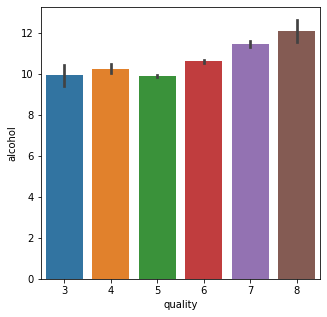

In [12]:
# alcohol vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',data=wine_data)

As per above observation the more the alcohol the better the quality of wine.

<AxesSubplot:>

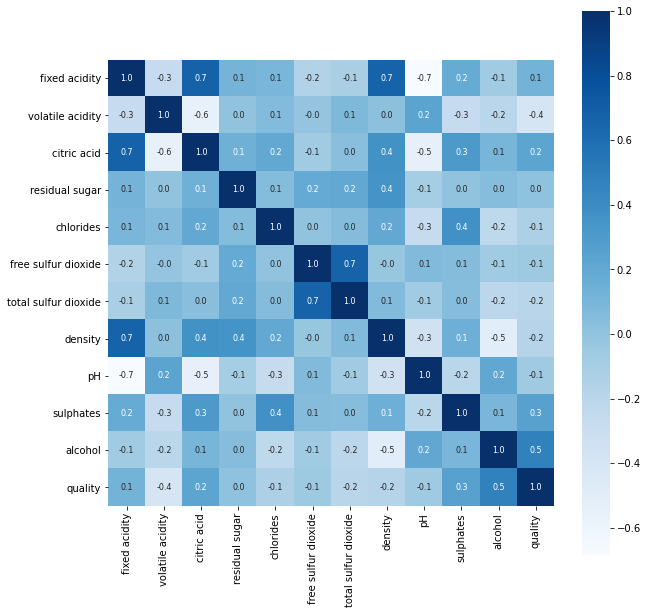

In [13]:
# Using heatmap to understand the correlation between the columns
corr = wine_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cbar=True,square=True,fmt='.1f',annot_kws={'size':8},cmap='Blues')

In [14]:
wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [15]:
# Segregating dataset into independent and dependent wise where x will be my independent and y will be my dependent
x = wine_data.drop('quality',axis=1)

In [16]:
y=wine_data['quality']

In [17]:
# Label Binarization/Encoding
y=wine_data['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [18]:
# As i can see that this is an Imbalance Data set
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [19]:
# converting from Imbalance to Balance dataset
from imblearn.over_sampling import SMOTE
sm = SMOTE()
trainx,trainy = sm.fit_resample(x,y)

In [20]:
# Now my X and Y is balanced
trainy.value_counts()

1    1382
0    1382
Name: quality, dtype: int64

In [21]:
x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size=.20,random_state=5)

In [22]:
# Need to check whether my data has properly divided into Train and Test data or not
print(trainy.shape,y_train.shape,y_test.shape)

(2764,) (2211,) (553,)


In [29]:
# # Importing required Algorithms
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [31]:
# LOGISTIC REGRESSION
log = LogisticRegression()
log.fit(x_train,y_train)
log_pd = log.predict(x_test)
accuracy_score(y_test,log_pd)

0.8264014466546112

In [32]:
# DECISION TREE CLASSIFIER
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree_pd = tree.predict(x_test)
accuracy_score(y_test,tree_pd)

0.9150090415913201

In [34]:
# RANDOM FOREST CLASSIFIER
forest = RandomForestClassifier()
forest.fit(x_train,y_train)
forest_pd = forest.predict(x_test)
accuracy_score(y_test,forest_pd)

0.9403254972875226

In [35]:
# SUPPORT VECTOR CLASSIFIER
svm = SVC()
svm.fit(x_train,y_train)
svm_pd = svm.predict(x_test)
accuracy_score(y_test,svm_pd)

0.755877034358047

In [36]:
# NOW CHECKING CROSS_VAL_SCORE
from sklearn.model_selection import cross_val_score

In [38]:
#cross_val_score for LOGISTIC REGRESSION
print(cross_val_score(log,x,y,cv=5).mean())

0.8705446708463951


In [39]:
#cross_val_score for DECISION TREE CLASSIFIER
print(cross_val_score(tree,x,y,cv=5).mean())

0.791108934169279


In [41]:
#cross_val_score for RANDOM FOREST CLASSIFIER
print(cross_val_score(forest,x,y,cv=5).mean())

0.8693005485893417


In [42]:
#cross_val_score for SUPPORT VECTOR MACHINE
print(cross_val_score(svm,x,y,cv=5).mean())

0.8642907523510971


In [44]:
# from below mentioned calculation we came to the conclucsion that LOGISTIC REGRESSION has minimum dfference, hence we will go with LOGISTIC REGRESSION



#Model	                              AC                    CV                     Diff

#LOGISTIC REGRESSION             0.8264014466546112   0.8705446708463951       -0.044143224

#DECISION TREE CLASSIFIER        0.9150090415913201   0.791108934169279         0.123900107

#RANDOM FOREST CLASSIFIER        0.9403254972875226   0.8693005485893417        0.071024949

#SUPPORT VECTOR CLASSIFIER       0.755877034358047    0.8642907523510971        -0.108413718


Parameter Tuning for LOGISTIC REGRESSION

In [73]:
log.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [70]:
parameter = {'solver':['newton-cg', 'lbfgs', 'liblinear'],
             'penalty':['l2', 'l1', 'elasticnet','none'],
              'C':[1.0, 0.1, 0.01, 1],
             'multi_class':['auto', 'ovr', 'multinomial']}

In [74]:
from sklearn.model_selection import GridSearchCV
gsc = GridSearchCV(estimator=log,param_grid=parameter,cv=5)

In [75]:
gsc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.1, 0.01, 1],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l2', 'l1', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [76]:
print(gsc.best_params_)

{'C': 1.0, 'multi_class': 'auto', 'penalty': 'none', 'solver': 'newton-cg'}


In [78]:
# Now building the model with the parameter which i have received from gsc.best_params_
final_model = LogisticRegression(C= 1.0, multi_class= 'auto', penalty= 'none', solver= 'newton-cg')
final_model.fit(x_train,y_train)
final_model_pd = final_model.predict(x_test)
accuracy_score(final_model_pd,y_test)

0.8264014466546112

SAVING THE MODEL

In [80]:
import joblib
joblib.dump(final_model,"Final_model.pkl")

['Final_model.pkl']